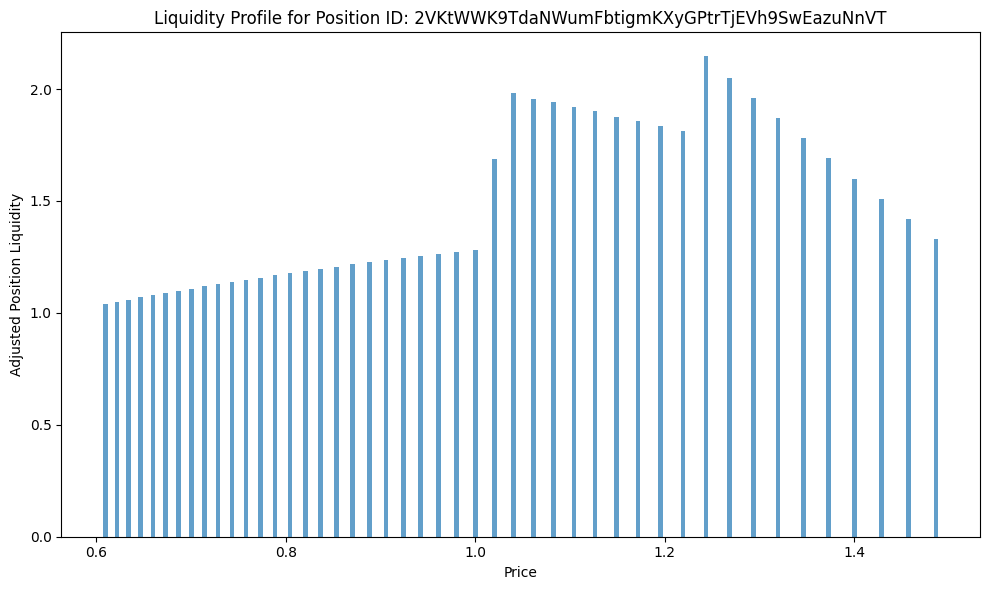

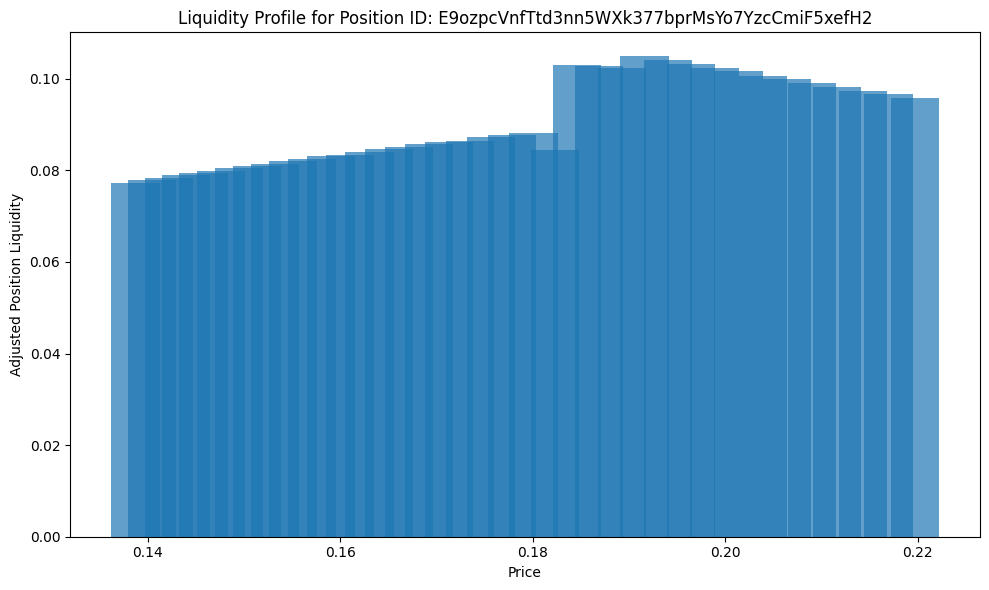

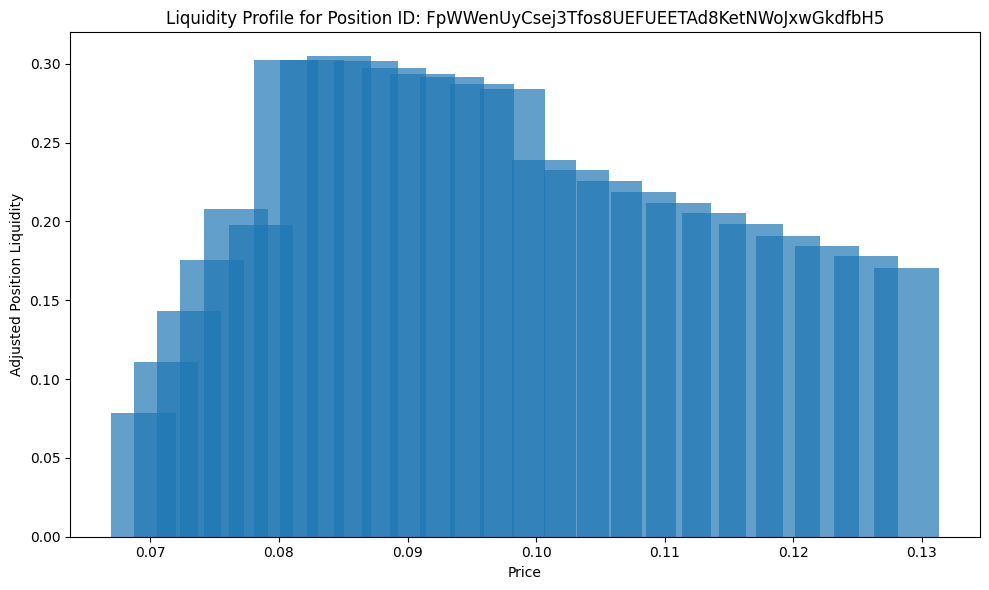

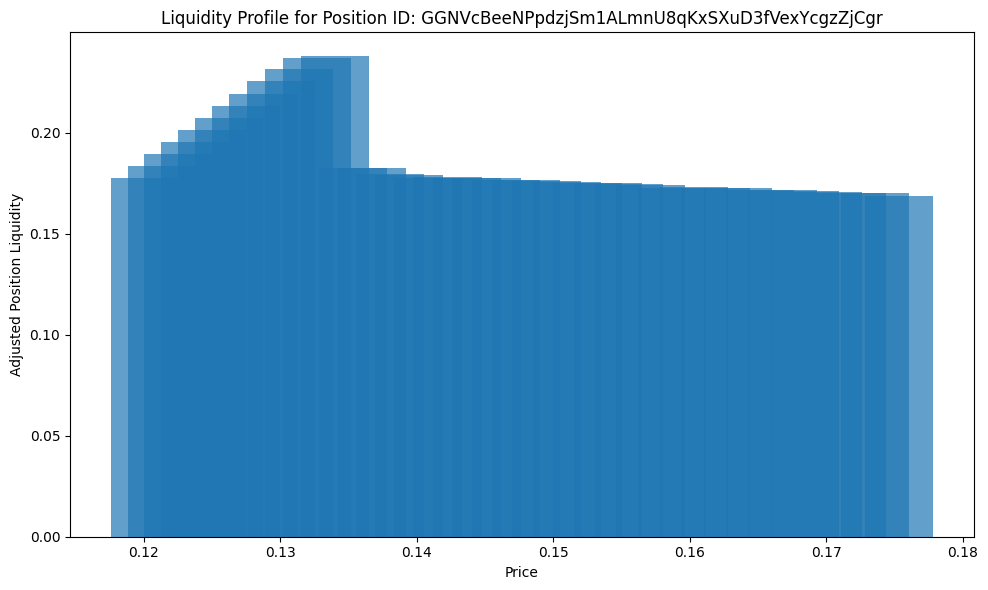

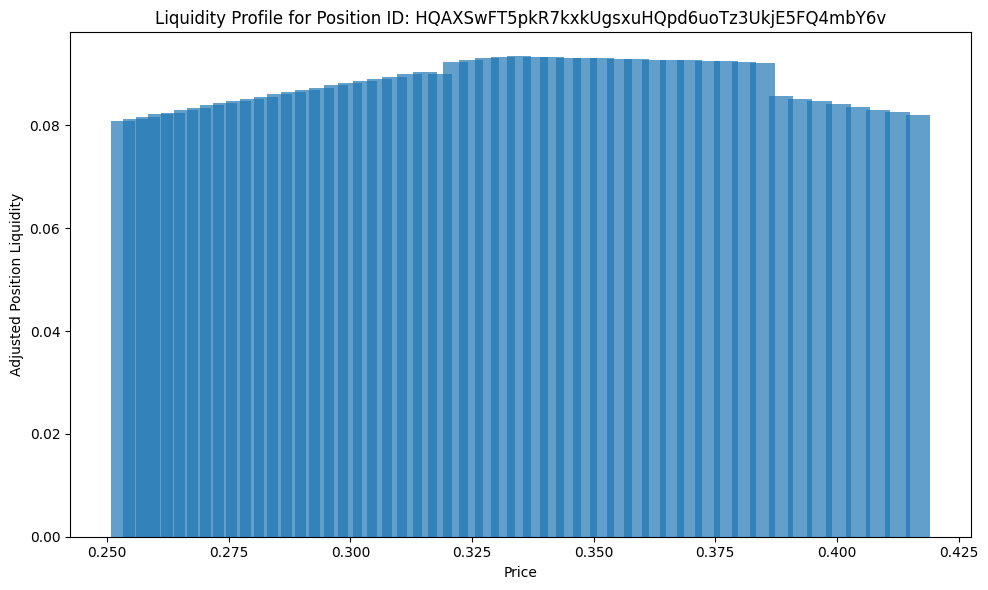

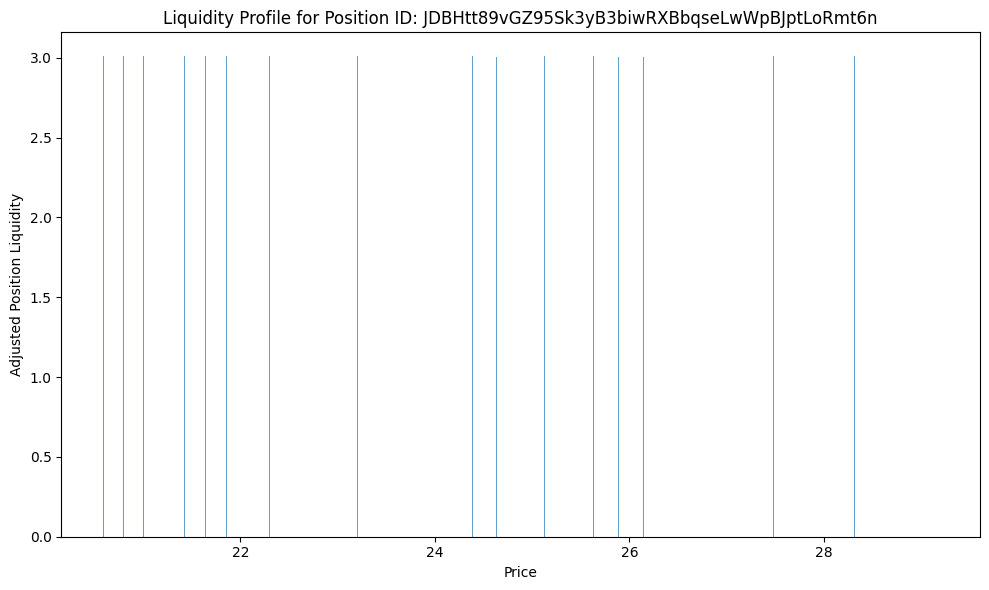

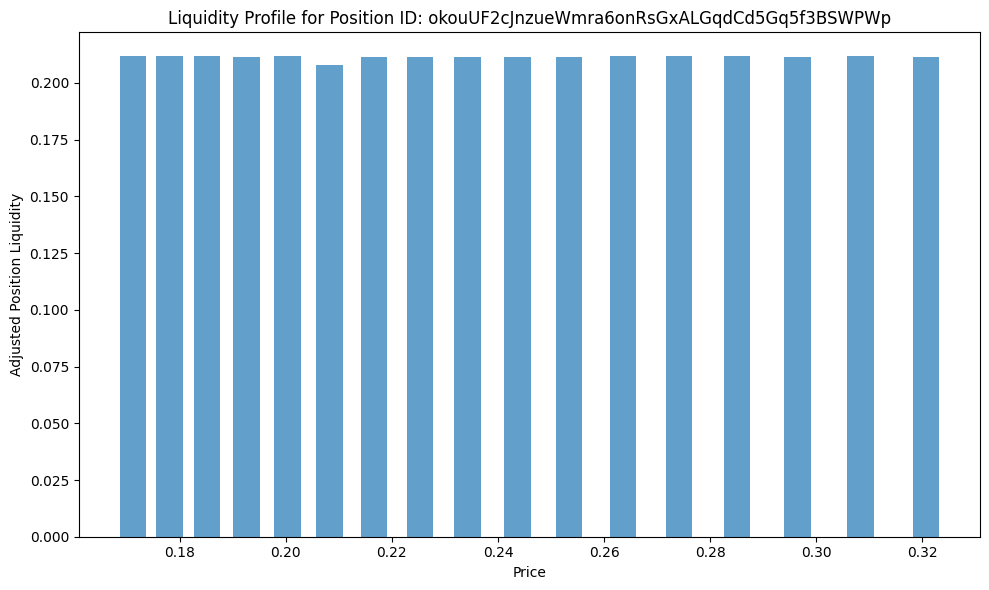

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'liquidity_profile.csv'

if not os.path.exists(file_path):
    print(f"CSV file not found in the current directory: {os.getcwd()}. Please upload or move the file there.")
else:
    df = pd.read_csv(file_path)

    df['Position Liquidity'] = pd.to_numeric(df['Position Liquidity'], errors='coerce')
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
    
    # Adjust liquidity: assuming tokens have 28 decimals 
    DECIMALS = 28
    df['Position Liquidity (Adjusted)'] = df['Position Liquidity'] / (10 ** DECIMALS)
    
    # Filter out rows where adjusted liquidity is zero
    df = df[df['Position Liquidity (Adjusted)'] > 0]
    
    # Group the data by "Position ID"
    grouped = df.groupby('Position ID')
    
    for pos_id, group in grouped:
        plt.figure(figsize=(10, 6))
        plt.bar(group['Price'], group['Position Liquidity (Adjusted)'], width=0.005, alpha=0.7)
        plt.xlabel('Price')
        plt.ylabel('Adjusted Position Liquidity')
        plt.title(f'Liquidity Profile for Position ID: {pos_id}')
        plt.tight_layout()
        plt.show()
